## ✊ Sign Language Digit Recognition

Given *images of digits in sign language*, let's try to recognize which **digit** is present in a given image.

We will use a Tensorflow/Keras CNN to make our predictions.

Data source: https://www.kaggle.com/datasets/ardamavi/sign-language-digits-dataset

### Importing Libraries

In [3]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [4]:
X = np.load('archive/X.npy')
Y = np.load('archive/Y.npy')

In [5]:
X

array([[[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 ,
         0.5137255 , 0.5019608 ],
        [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 ,
         0.5176471 , 0.50980395],
        [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 ,
         0.5254902 , 0.5137255 ],
        ...,
        [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 ,
         0.54509807, 0.53333336],
        [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807,
         0.53333336, 0.52156866],
        [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 ,
         0.52156866, 0.50980395]],

       [[0.59607846, 0.60784316, 0.61960787, ..., 0.4627451 ,
         0.4509804 , 0.44313726],
        [0.60784316, 0.61960787, 0.6313726 , ..., 0.4745098 ,
         0.4627451 , 0.4509804 ],
        [0.6156863 , 0.627451  , 0.6431373 , ..., 0.4862745 ,
         0.4745098 , 0.4627451 ],
        ...,
        [0.50980395, 0.5176471 , 0.5254902 , ..., 0.40392157,
         0.39607844, 0.3882353 ],
        [0.5

In [6]:
X.shape

(2062, 64, 64)

In [7]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [8]:
Y.shape

(2062, 10)

In [12]:
y = np.argmax(Y, axis=1)
y

array([0, 0, 0, ..., 9, 9, 9])

In [13]:
y.shape

(2062,)

### Visualizing Images

In [15]:
def visualizing_image(image, label):
    plt.axis('off')
    plt.title(label)
    plt.imshow(image)

In [16]:
X[0]

array([[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 , 0.5137255 ,
        0.5019608 ],
       [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 , 0.5176471 ,
        0.50980395],
       [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 , 0.5254902 ,
        0.5137255 ],
       ...,
       [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 , 0.54509807,
        0.53333336],
       [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807, 0.53333336,
        0.52156866],
       [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 , 0.52156866,
        0.50980395]], dtype=float32)

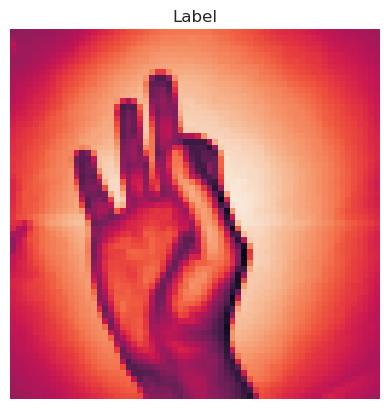

In [18]:
visualizing_image(X[0], label='Label')

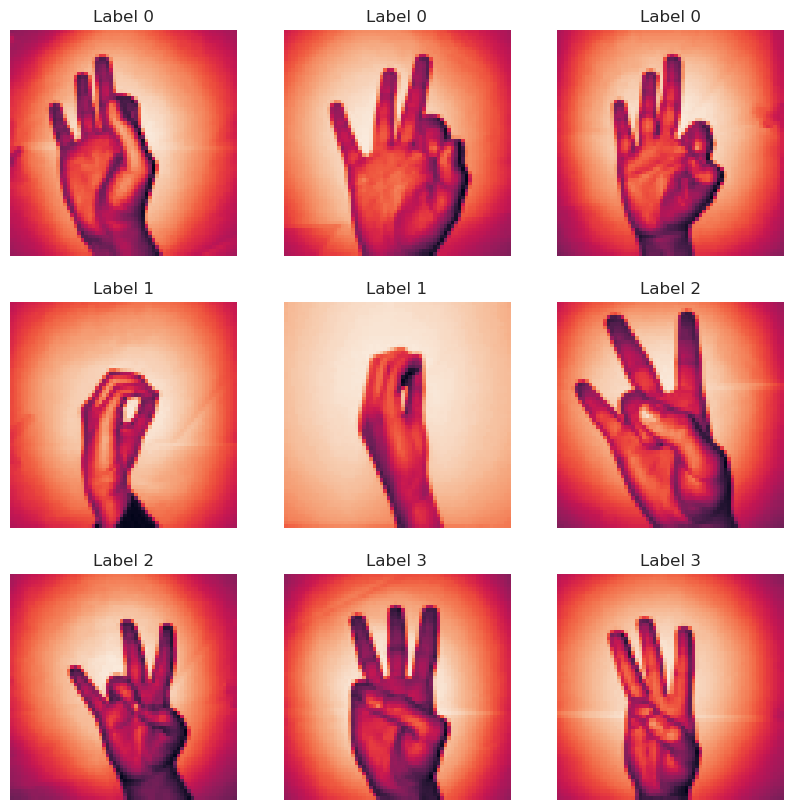

In [19]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    visualizing_image(X[i * 100], label="Label " + str(y[i * 100]))

### Preprocessing

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

### Modeling

In [25]:
inputs = tf.keras.Input(shape=(64,64,1))

conv1 = tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), activation='relu')(inputs)
pool1 = tf.keras.layers.AveragePooling2D()(conv1)

conv2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu')(pool1)
pool2 = tf.keras.layers.AveragePooling2D()(conv2)

flatten = tf.keras.layers.Flatten()(pool2)

dense1 = tf.keras.layers.Dense(units=120, activation='relu')(flatten)
dense2 = tf.keras.layers.Dense(units=84, activation='relu')(dense1)

outputs = tf.keras.layers.Dense(units=10, activation='softmax')(dense2)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 6)         156       
                                                                 
 average_pooling2d_6 (Averag  (None, 30, 30, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 13, 13, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_3 (Flatten)         (None, 2704)              0   

### Training

In [26]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 5,
            restore_best_weights = True
        )
    ]
)

Epoch 1/100
37/37 [==============================] - 3s 57ms/step - loss: 2.3045 - accuracy: 0.1205 - val_loss: 2.2896 - val_accuracy: 0.1073
Epoch 2/100
37/37 [==============================] - 1s 39ms/step - loss: 2.2162 - accuracy: 0.2054 - val_loss: 2.0823 - val_accuracy: 0.1834
Epoch 3/100
37/37 [==============================] - 2s 49ms/step - loss: 1.7122 - accuracy: 0.4116 - val_loss: 1.5904 - val_accuracy: 0.4567
Epoch 4/100
37/37 [==============================] - 2s 53ms/step - loss: 1.2874 - accuracy: 0.5771 - val_loss: 1.3360 - val_accuracy: 0.4983
Epoch 5/100
37/37 [==============================] - 2s 44ms/step - loss: 1.0041 - accuracy: 0.6785 - val_loss: 0.9118 - val_accuracy: 0.7405
Epoch 6/100
37/37 [==============================] - 2s 49ms/step - loss: 0.8209 - accuracy: 0.7461 - val_loss: 0.7608 - val_accuracy: 0.7509
Epoch 7/100
37/37 [==============================] - 2s 44ms/step - loss: 0.6379 - accuracy: 0.8128 - val_loss: 0.7890 - val_accuracy: 0.7301
Epoch 

In [30]:
len(history.history['loss'])

23

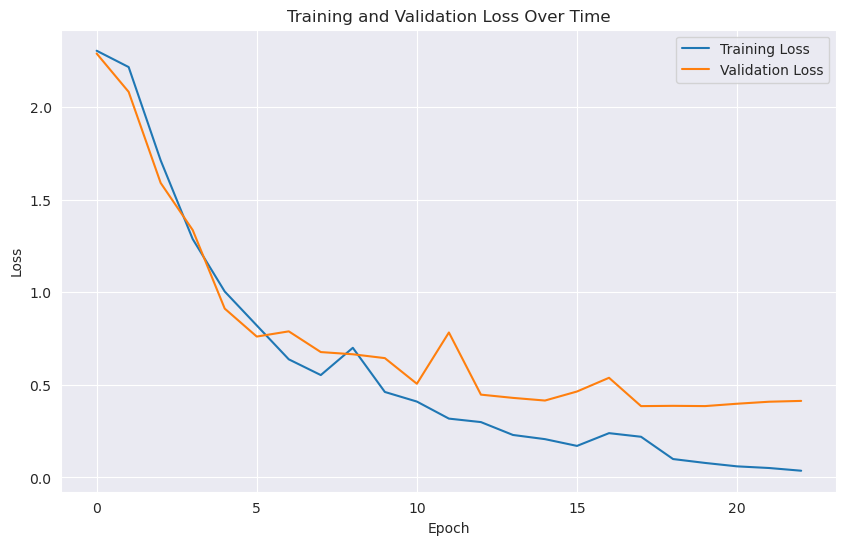

In [33]:
plt.figure(figsize=(10,6))

epochs_range = range(len(history.history['loss']))
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Time')
plt.show()

### Results

In [36]:
np.argmax(model.predict(X_test), axis=1)

20/20 [==============================] - 0s 17ms/step


array([1, 0, 1, 7, 0, 8, 1, 4, 0, 2, 9, 4, 5, 0, 5, 7, 5, 4, 4, 1, 8, 6,
       9, 2, 5, 5, 6, 6, 3, 0, 3, 0, 4, 6, 4, 5, 3, 5, 9, 7, 0, 4, 4, 6,
       5, 8, 2, 3, 7, 2, 7, 9, 7, 2, 7, 8, 4, 3, 0, 5, 5, 4, 3, 9, 5, 8,
       8, 0, 3, 1, 7, 2, 9, 7, 3, 5, 6, 0, 2, 5, 1, 3, 2, 5, 9, 3, 9, 2,
       1, 3, 4, 6, 5, 1, 0, 5, 3, 9, 2, 7, 1, 7, 4, 4, 5, 1, 8, 5, 1, 3,
       3, 4, 7, 3, 2, 6, 5, 2, 2, 9, 4, 6, 2, 3, 8, 4, 9, 6, 6, 7, 9, 8,
       6, 5, 1, 0, 2, 4, 3, 0, 9, 3, 5, 1, 1, 1, 7, 2, 7, 8, 4, 8, 0, 7,
       9, 9, 7, 9, 7, 8, 1, 0, 2, 0, 0, 5, 2, 1, 3, 6, 0, 9, 1, 0, 1, 3,
       8, 0, 3, 7, 8, 7, 3, 7, 3, 5, 3, 3, 8, 5, 6, 1, 4, 7, 2, 9, 8, 8,
       4, 5, 4, 3, 4, 2, 5, 6, 4, 0, 5, 2, 6, 6, 2, 8, 7, 5, 8, 1, 4, 9,
       8, 4, 1, 3, 0, 9, 2, 8, 3, 7, 8, 2, 6, 7, 3, 2, 7, 8, 4, 7, 2, 3,
       1, 1, 1, 3, 0, 7, 0, 3, 3, 3, 7, 7, 3, 7, 3, 4, 0, 4, 9, 7, 3, 6,
       5, 8, 4, 3, 0, 8, 2, 3, 1, 5, 8, 9, 9, 9, 5, 0, 2, 9, 1, 5, 2, 3,
       7, 3, 1, 9, 0, 1, 3, 5, 8, 2, 6, 7, 4, 9, 8,

In [37]:
def evaluate_model(model, X_test, y_test):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)

    results = model.evaluate(X_test, y_test, verbose=0)
    print("Test Loss: {:.5f}".format(results[0]))
    print("Test Accuracy: {:.2f}%".format(results[1]*100))

    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report:\n-------------------------\n", clr)

20/20 [==============================] - 0s 14ms/step
Test Loss: 0.51473
Test Accuracy: 86.43%


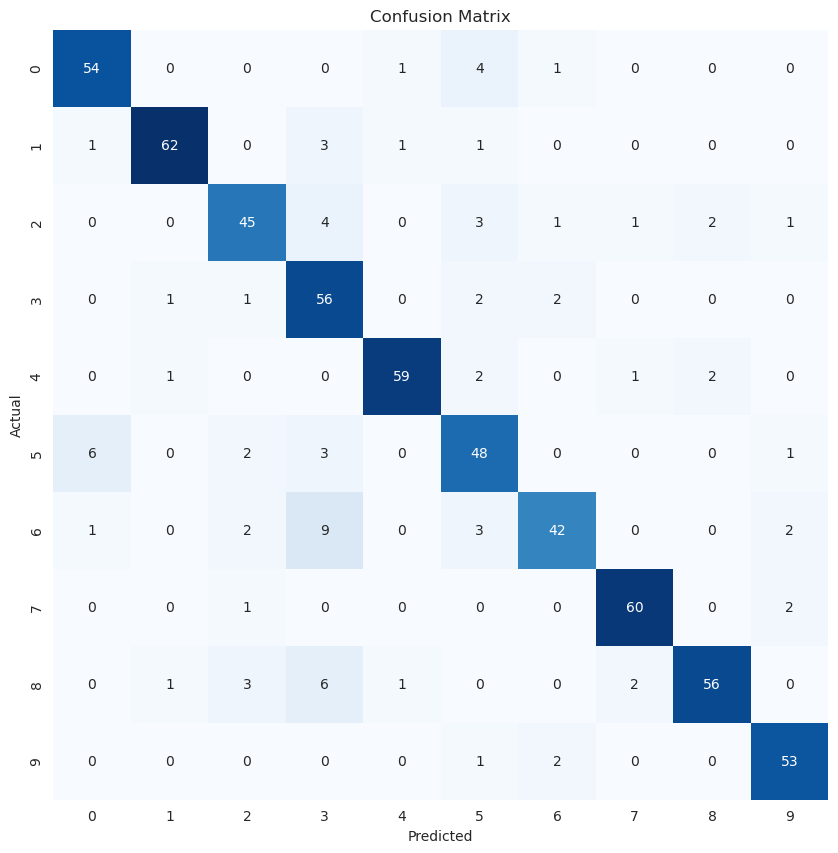

Classification Report:
-------------------------
               precision    recall  f1-score   support

           0       0.87      0.90      0.89        60
           1       0.95      0.91      0.93        68
           2       0.83      0.79      0.81        57
           3       0.69      0.90      0.78        62
           4       0.95      0.91      0.93        65
           5       0.75      0.80      0.77        60
           6       0.88      0.71      0.79        59
           7       0.94      0.95      0.94        63
           8       0.93      0.81      0.87        69
           9       0.90      0.95      0.92        56

    accuracy                           0.86       619
   macro avg       0.87      0.86      0.86       619
weighted avg       0.87      0.86      0.87       619



In [38]:
evaluate_model(model, X_test, y_test)